In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
import imblearn
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=MinMaxScaler()
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [4]:
!pip install scikit-learn

# DATASET

In [6]:
df=pd.read_csv(r"C:\Users\Niraj\Music\healthcare-dataset-stroke-data.csv")

In [7]:
df.shape

(5110, 12)

In [8]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
df = df.drop(df[df['gender'] == 'Other'].index)

# Missing value

In [11]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Replacing values with Standarization

In [12]:
mean_bmi = df['bmi'].mean()
std_bmi = df['bmi'].std()

In [13]:
df['bmi'] = df['bmi'].fillna((df['bmi'] - mean_bmi) / std_bmi)

In [14]:
df['bmi'] = df['bmi'].replace([np.inf, -np.inf, np.nan], 0)

In [15]:
df.bmi=df.bmi.astype(int)

In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   int32  
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 498.9+ KB


# checking null values

In [17]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# label encoding

In [18]:
# Create a DataFrame object
from sklearn import preprocessing
data_df = pd.DataFrame(df, columns =['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi','smoking_status', 'stroke'])


for column in data_df:

    label_encoder = preprocessing.LabelEncoder()

    data_df[column]= label_encoder.fit_transform(data_df[column])
    data_df[column].unique()

In [19]:
data_df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3849,27,1,1
1,0,82,0,0,1,3,0,3587,0,2,1
2,1,101,0,1,1,2,0,2483,23,2,1
3,0,70,0,0,1,2,1,3384,25,3,1
4,0,100,1,0,1,3,0,3393,15,2,1


# by performing one hot encoding

In [20]:
data_encoded = pd.get_dummies(data_df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], dtype=int)

In [21]:
print(data_encoded.head())

   age  hypertension  heart_disease  avg_glucose_level  bmi  stroke  gender_0  \
0   88             0              1               3849   27       1         0   
1   82             0              0               3587    0       1         1   
2  101             0              1               2483   23       1         0   
3   70             0              0               3384   25       1         1   
4  100             1              0               3393   15       1         1   

   gender_1  ever_married_0  ever_married_1  ...  work_type_1  work_type_2  \
0         1               0               1  ...            0            1   
1         0               0               1  ...            0            0   
2         1               0               1  ...            0            1   
3         0               0               1  ...            0            1   
4         0               0               1  ...            0            0   

   work_type_3  work_type_4  Residence_type_

# showing distribution stroke class in dataset

Class=1, n=249 (4.874%)
Class=0, n=4860 (95.126%)


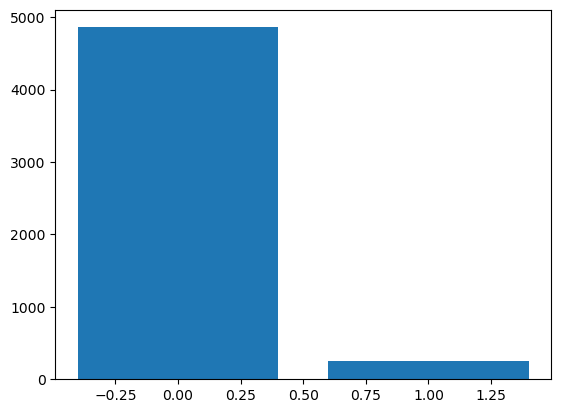

In [22]:
from collections import Counter
from matplotlib import pyplot

# summarize distribution
counter = Counter(df["stroke"])
for k,v in counter.items():
	per = v / len(df["stroke"]) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

C:\Users\Niraj\AppData\Local\Temp\ipykernel_7272\1580996828.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


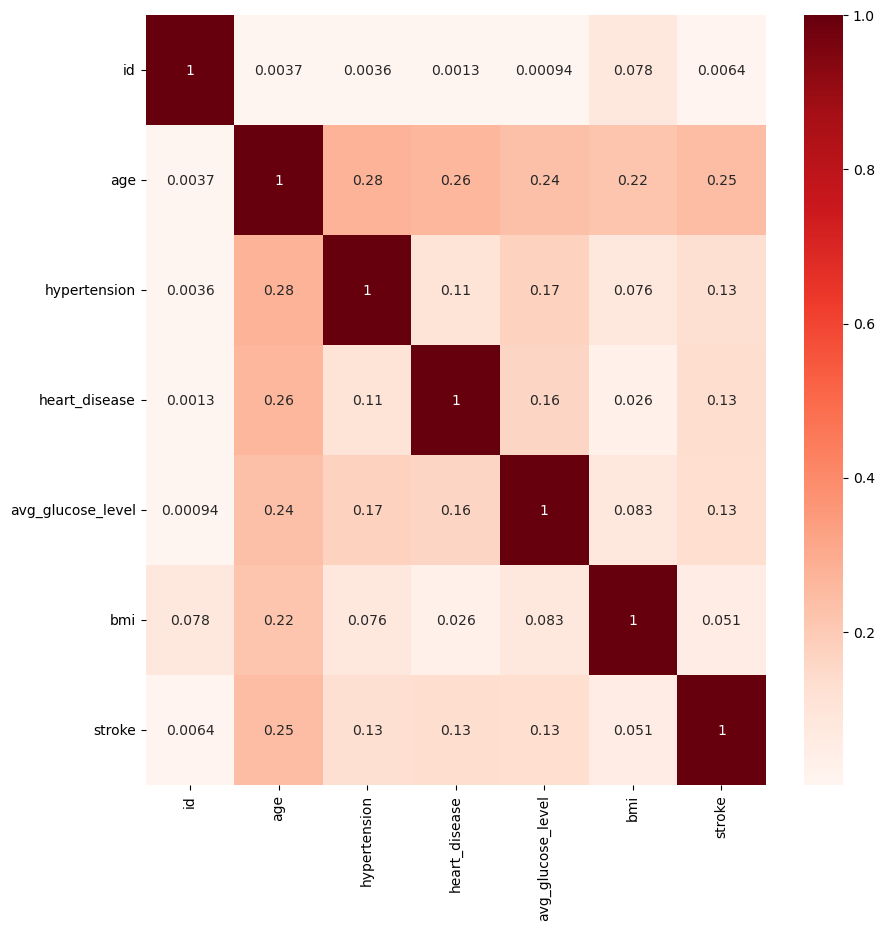

In [23]:
corr_matrix = df.corr().abs()

filtered_corr_df = corr_matrix

plt.figure(figsize=(10,10))
sns.heatmap(filtered_corr_df, annot=True, cmap="Reds")
plt.show()

# spliting dataset into training and testing

In [24]:
df=df.drop(["gender","smoking_status","ever_married","work_type","Residence_type"],axis=1)

In [25]:
from sklearn.model_selection import train_test_split

X = df.drop("stroke", axis=1)
y = df["stroke"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
X_train.shape,y_train.shape

((4087, 6), (4087,))

# scaling the data

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,27.330593,0.048738
std,21162.008804,22.613575,0.296633,0.226084,45.285004,9.471288,0.215340
min,67.000000,0.080000,0.000000,0.000000,55.120000,0.000000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,22.000000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,27.000000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,32.000000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.000000,1.000000


In [30]:
scaler=StandardScaler()

In [31]:
scaler.fit(X_train)

StandardScaler()

In [32]:
x_train_scaler=scaler.transform(X_train)
x_test_scaler=scaler.transform(X_test)

In [33]:
x_train_scaler

array([[-1.49423029,  1.58859399, -0.3201699 , -0.23038903,  0.14270336,
         0.06489276],
       [ 0.93666119,  0.83688063, -0.3201699 , -0.23038903, -0.3927188 ,
         0.91054189],
       [ 0.86316481, -0.97607511, -0.3201699 , -0.23038903, -1.02677136,
         0.59342346],
       ...,
       [-0.23471998, -1.85336881, -0.3201699 , -0.23038903, -0.19545801,
        -1.09787479],
       [-0.23600272, -0.22436175, -0.3201699 , -0.23038903, -0.26921065,
        -0.67505023],
       [-0.35577283,  0.12938571, -0.3201699 , -0.23038903, -0.13227291,
         2.39042786]])

In [34]:
x_test_scaler

array([[ 0.17195681, -0.53389078, -0.3201699 , -0.23038903, -0.90942761,
        -0.46363795],
       [ 0.89423568, -0.13592489, -0.3201699 , -0.23038903, -0.89974069,
         0.06489276],
       [ 1.58691646,  0.39469631, -0.3201699 , -0.23038903,  0.10747822,
         0.27630504],
       ...,
       [ 0.24602329,  0.39469631, -0.3201699 , -0.23038903, -0.84183936,
         0.38201118],
       [ 0.13371208,  0.57157004, -0.3201699 , -0.23038903,  0.49473462,
        -0.3579318 ],
       [ 1.13330082,  1.54437556,  3.12334167,  4.34048452,  0.00554546,
        -0.04081338]])

In [35]:
x_train_scaler=pd.DataFrame(x_train_scaler,columns=X_train.columns)

In [36]:
x_train_scaler

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,-1.494230,1.588594,-0.320170,-0.230389,0.142703,0.064893
1,0.936661,0.836881,-0.320170,-0.230389,-0.392719,0.910542
2,0.863165,-0.976075,-0.320170,-0.230389,-1.026771,0.593423
3,0.006008,-0.533891,-0.320170,-0.230389,-0.890714,0.276305
4,1.175821,-0.533891,-0.320170,-0.230389,-1.024350,-0.886463
...,...,...,...,...,...,...
4082,1.199386,0.792662,-0.320170,-0.230389,0.836198,0.170599
4083,-1.668256,0.792662,3.123342,-0.230389,1.406625,3.447489
4084,-0.234720,-1.853369,-0.320170,-0.230389,-0.195458,-1.097875
4085,-0.236003,-0.224362,-0.320170,-0.230389,-0.269211,-0.675050


In [37]:
x_test_scaler=pd.DataFrame(x_test_scaler,columns=X_test.columns)

In [38]:
x_test_scaler

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,0.171957,-0.533891,-0.320170,-0.230389,-0.909428,-0.463638
1,0.894236,-0.135925,-0.320170,-0.230389,-0.899741,0.064893
2,1.586916,0.394696,-0.320170,-0.230389,0.107478,0.276305
3,0.084825,1.588594,3.123342,-0.230389,-0.649862,-0.886463
4,-1.324576,1.411720,-0.320170,-0.230389,-0.250717,-0.040813
...,...,...,...,...,...,...
1017,0.623862,-1.821532,-0.320170,-0.230389,0.832456,-2.894879
1018,-1.104609,-1.241386,-0.320170,-0.230389,1.865433,-0.569344
1019,0.246023,0.394696,-0.320170,-0.230389,-0.841839,0.382011
1020,0.133712,0.571570,-0.320170,-0.230389,0.494735,-0.357932


In [39]:
x_test_scaler.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,0.021956,0.034493,0.077418,0.082685,-0.001950,-0.029333
std,1.026471,0.999207,1.101003,1.155123,0.984805,1.005514
min,-1.726359,-1.901125,-0.320170,-0.230389,-1.121219,-2.894879
25%,-0.889334,-0.754983,-0.320170,-0.230389,-0.619646,-0.569344
50%,0.048790,0.173604,-0.320170,-0.230389,-0.301684,-0.040813
75%,0.904700,0.792662,-0.320170,-0.230389,0.172590,0.487717
max,1.733767,1.721249,3.123342,4.340485,3.532022,4.610257


In [40]:
x_train_scaler.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
count,4.087000e+03,4.087000e+03,4.087000e+03,4.087000e+03,4.087000e+03,4.087000e+03
mean,-1.086590e-16,2.781670e-17,3.477087e-18,1.738544e-18,1.747236e-16,8.605790e-17
std,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00
min,-1.727167e+00,-1.901125e+00,-3.201699e-01,-2.303890e-01,-1.123641e+00,-2.894879e+00
25%,-8.867331e-01,-7.992014e-01,-3.201699e-01,-2.303890e-01,-6.402855e-01,-4.636379e-01
50%,2.035568e-02,4.094884e-02,-3.201699e-01,-2.303890e-01,-3.180855e-01,-4.081338e-02
75%,8.523328e-01,7.926622e-01,-3.201699e-01,-2.303890e-01,1.753967e-01,4.877173e-01
max,1.734954e+00,1.721249e+00,3.123342e+00,4.340485e+00,3.645403e+00,7.358616e+00


In [41]:
np.round(x_train_scaler.describe(),1)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
count,4087.0,4087.0,4087.0,4087.0,4087.0,4087.0
mean,-0.0,0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.7,-1.9,-0.3,-0.2,-1.1,-2.9
25%,-0.9,-0.8,-0.3,-0.2,-0.6,-0.5
50%,0.0,0.0,-0.3,-0.2,-0.3,-0.0
75%,0.9,0.8,-0.3,-0.2,0.2,0.5
max,1.7,1.7,3.1,4.3,3.6,7.4


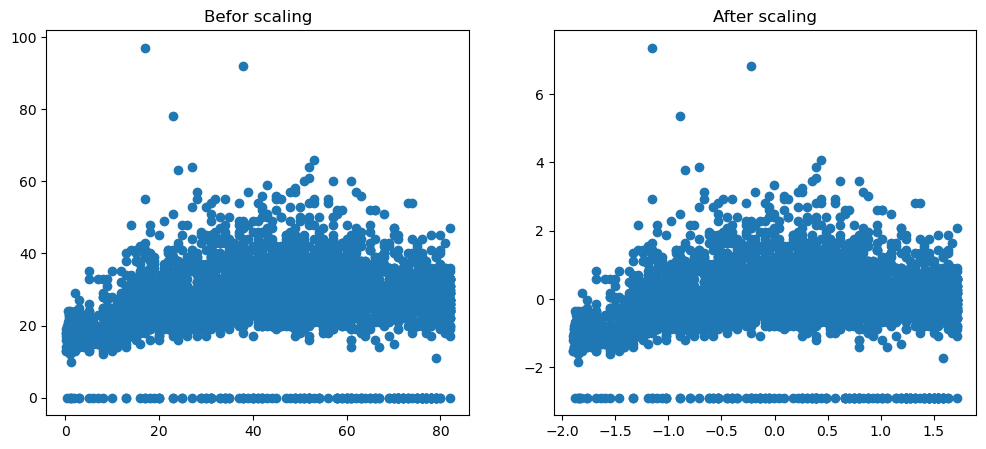

In [42]:
fig,(a1,a2)=plt.subplots(ncols=2,figsize=(12,5))
a1.scatter(X_train["age"],X_train["bmi"])
a1.set_title("Befor scaling")
a2.scatter(x_train_scaler["age"],x_train_scaler["bmi"])
a2.set_title("After scaling")
plt.show()

# performing linear regression

In [43]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [44]:
y_pred

array([0.01444262, 0.02362258, 0.05869939, ..., 0.03891576, 0.08033818,
       0.20973741])

# Mean absolute error

In [45]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [46]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.05164516092256893


# rmse

In [47]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))

In [48]:
rmse

0.22725571702944886

# diffrence between actual and predicted

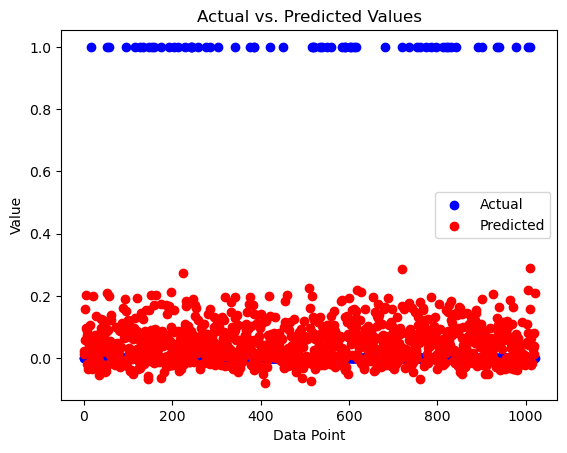

In [49]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Plot the actual values
ax.scatter(range(len(y_test)), y_test, color='blue', label='Actual')

# Plot the predicted values
ax.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')

# Set labels and title
ax.set_xlabel('Data Point')
ax.set_ylabel('Value')
ax.set_title('Actual vs. Predicted Values')

# Add a legend
ax.legend()

# Display the plot
plt.show()


In [67]:
oldX, y =  df.drop('stroke', axis=1).values, df['stroke'].values

In [77]:
encoder = OneHotEncoder(handle_unknown='ignore')

#encode columns with string data
ct = ColumnTransformer([
    ('encoder', encoder, [0, 1]) 
], remainder='passthrough')

X = ct.fit_transform(oldX)

In [78]:
pipe = Pipeline([('lr', LinearSVC(C=0.0001, class_weight={1: 1.5},dual=False,max_iter=100000))
]).fit(X_train, y_train)

In [79]:

from joblib import dump, load

In [81]:
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

smote_enn = SMOTEENN(random_state=0)


X_resampled, y_resampled = smote_enn.fit_resample(X, y)

smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

AttributeError: 'NoneType' object has no attribute 'split'

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled)

NameError: name 'X_resampled' is not defined

In [ ]:
dump(pipe, 'savedModel.joblib')

In [ ]:
dump(ct, 'savedColumnTransformer.joblib')

In [ ]:
from sklearn.metrics import classification_report

predictions = pipe.predict(X_test)
print(classification_report(y_test, predictions))

In [57]:
def gather_user_data_output_result(pipe, ct):
    gender = input("please input gender as either: 'male' or 'female' for male 0 for female 1")
    age = float(input("please input age as float"))
    hypertension = int(input("please input if you have hypertension as either 1 for yes or 0 for no"))
    heart_disease = int(input("please input if you have heart disease as either 1 for yes or 0 for no"))
    ever_married = input("please input if you have ever been married as either 'Yes' or 'No' yes 0 and no 1")

    avg_glucose_level = float(input("please input your average glucose level as a float"))
    row = [gender,age,hypertension,heart_disease,ever_married,avg_glucose_level]
    row = ct.transform([row])
    result = pipe.predict(row)
    result = result[0]
    if result == 0:
        print("According to the model you will likely not have a stroke.")
    elif result == 1:
        print("According to the model you may likely  have a stroke. Please see a doctor")
    return result



In [58]:
gather_user_data_output_result(pipe, ct)

please input gender as either: 'male' or 'female' for male 0 for female 10
please input age as float18
please input if you have hypertension as either 1 for yes or 0 for no0
please input if you have heart disease as either 1 for yes or 0 for no0
please input if you have ever been married as either 'Yes' or 'No' yes 0 and no 11
please input your average glucose level as a float4.5


C:\Users\Niraj\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


ValueError: X has 5217 features, but LinearSVC is expecting 6 features as input.